In [6]:
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('../')

In [17]:
grid = np.zeros((4, 4))
grid[0, 0] = 1
grid[1, 3] = 1
grid2 = np.zeros((4, 4))

In [18]:
num = len(grid)
for i in range(num):
    for j in range(num):
        grid2[i, j] = grid[j, num-1-i]

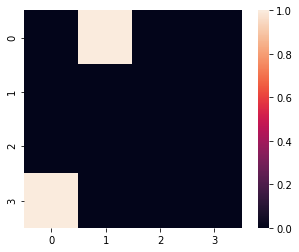

In [19]:
sns.heatmap(grid2, square=True)

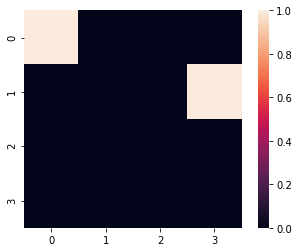

In [14]:
sns.heatmap(grid, square=True)

In [24]:
def power_2_db_(value, utah=True):
    '''Transform the power of signals into decibal signal strength
       y = 20*log10(x)
    '''
    if utah == False:
        return 10*np.log10(value)  # here value is power
    else:
        return 20*np.log10(value)  # here value is amplitude (for utah data)


def db_2_power_(db, utah=True):
    '''Transform the decibal signal strength into power
       x = 10^(y/20)
    '''
    if utah == False:
        return np.power(10, np.array(db)/10)  # returning power
    else:
        return np.power(10, np.array(db)/20)  # returning amplitude (for utah data)


In [27]:
db_2_power_(0.04246405277682376)

1.0049008246944606

In [25]:
power_2_db_(db_2_power_(-36.58923853310348)+db_2_power_(-74.75269746975547))

-36.48258572084903

In [2]:
savedSig = scipy.io.loadmat('savedSig/savedSig.mat')
trace = savedSig['savedSig']
trace.shape

(44, 44)

In [81]:
num = trace.shape[0]
for tx in range(num):
    for rx in range(num):
        if tx == rx:
            continue
        meas_num = len(trace[tx][rx])
        powers = []
        for i in range(meas_num):
            iq_samples = trace[tx][rx][i]
            amplitude  = np.absolute(iq_samples)
            powers.extend(list(20*np.log10(amplitude)))
        powers = np.array(powers)
        argsort = np.flip(np.argsort(powers))
        peaks = powers[argsort[0:10]]
        print(tx+1, rx+1, round(peaks.mean(), 3), round(peaks.std(), 3))


1 2 -50.295 0.635
1 3 -44.694 0.811
1 4 -64.14 0.504
1 5 -54.862 0.814
1 6 -54.72 0.196
1 7 -50.219 0.588
1 8 -55.544 0.319
1 9 -68.939 2.878
1 10 -60.164 0.654
1 11 -61.159 0.507
1 12 -68.853 0.303
1 13 -72.983 0.959
1 14 -64.252 0.276
1 15 -65.272 0.346
1 16 -61.988 0.382
1 17 -71.122 0.405
1 18 -61.195 0.502
1 19 -58.623 0.513
1 20 -60.587 0.8
1 21 -62.823 0.389
1 22 -62.424 0.444
1 23 -66.736 0.533
1 24 -64.48 0.703
1 25 -71.405 0.73
1 26 -67.493 0.683
1 27 -62.159 0.618
1 28 -73.207 0.574
1 29 -68.565 0.456
1 30 -72.043 0.516
1 31 -72.794 0.246
1 32 -74.054 0.425
1 33 -63.827 0.28
1 34 -65.55 0.407
1 35 -73.464 0.454
1 36 -67.159 0.508
1 37 -67.991 0.23
1 38 -69.981 0.724
1 39 -68.424 0.727
1 40 -76.049 0.544
1 41 -67.161 0.44
1 42 -71.914 0.396
1 43 -73.877 1.144
1 44 -78.69 0.641
2 1 -49.486 0.266
2 3 -52.966 0.644
2 4 -60.414 0.287
2 5 -61.914 1.234
2 6 -55.236 0.59
2 7 -56.406 0.533
2 8 -68.939 0.187
2 9 -72.812 0.347
2 10 -66.824 0.345
2 11 -72.13 0.527
2 12 -72.8 0.589
2 13 

11 23 -75.46 0.464
11 24 -70.059 0.602
11 25 -73.038 0.3
11 26 -68.577 1.13
11 27 -66.21 0.365
11 28 -60.919 0.428
11 29 -65.024 0.406
11 30 -54.994 0.708
11 31 -52.709 0.433
11 32 -69.726 0.795
11 33 -70.257 0.505
11 34 -73.536 0.54
11 35 -73.46 0.906
11 36 -75.251 0.873
11 37 -78.252 0.369
11 38 -74.716 0.31
11 39 -76.919 0.703
11 40 -74.427 0.715
11 41 -71.695 0.498
11 42 -70.22 0.451
11 43 -73.7 0.418
11 44 -66.229 0.644
12 1 -75.23 0.821
12 2 -74.984 2.086
12 3 -76.738 0.398
12 4 -75.79 0.099
12 5 -67.715 0.471
12 6 -70.142 0.644
12 7 -68.487 0.376
12 8 -69.782 0.728
12 9 -58.834 0.313
12 10 -62.146 0.574
12 11 -43.022 0.242
12 13 -46.889 0.414
12 14 -65.29 1.158
12 15 -66.523 0.547
12 16 -67.009 0.444
12 17 -64.752 0.732
12 18 -72.319 0.459
12 19 -76.747 0.974
12 20 -74.93 0.359
12 21 -72.996 0.591
12 22 -64.115 0.718
12 23 -73.902 0.667
12 24 -65.63 0.708
12 25 -73.417 0.551
12 26 -70.994 0.73
12 27 -68.446 1.016
12 28 -57.113 0.488
12 29 -58.392 0.612
12 30 -56.172 1.18
12 31 -

23 2 -69.844 0.501
23 3 -68.535 0.647
23 4 -66.262 1.338
23 5 -65.752 0.33
23 6 -58.463 0.907
23 7 -69.031 0.358
23 8 -66.19 0.318
23 9 -69.113 0.518
23 10 -63.148 0.378
23 11 -67.045 0.252
23 12 -71.779 0.674
23 13 -70.723 0.646
23 14 -60.497 0.498
23 15 -40.234 0.332
23 16 -60.523 2.524
23 17 -61.175 0.28
23 18 -57.729 0.524
23 19 -60.319 0.443
23 20 -62.74 0.458
23 21 -58.287 0.504
23 22 -54.066 0.556
23 24 -56.766 0.271
23 25 -56.983 0.44
23 26 -52.842 0.543
23 27 -61.84 0.47
23 28 -66.811 0.456
23 29 -62.721 0.475
23 30 -61.201 0.697
23 31 -69.185 0.717
23 32 -57.236 0.401
23 33 -58.895 0.305
23 34 -60.857 0.72
23 35 -63.444 0.844
23 36 -64.201 0.716
23 37 -71.258 0.914
23 38 -63.408 0.634
23 39 -58.874 0.333
23 40 -62.175 0.384
23 41 -62.311 0.422
23 42 -67.092 0.462
23 43 -66.877 0.527
23 44 -67.863 0.329
24 1 -66.268 0.443
24 2 -71.671 0.645
24 3 -68.962 0.2
24 4 -70.173 0.711
24 5 -66.466 0.299
24 6 -64.078 0.413
24 7 -69.151 0.425
24 8 -66.074 0.74
24 9 -65.663 0.486
24 10 -6

33 30 -66.162 0.493
33 31 -50.132 0.32
33 32 -35.39 0.608
33 34 -42.188 0.676
33 35 -47.204 1.85
33 36 -52.227 0.69
33 37 -64.057 0.635
33 38 -51.748 0.768
33 39 -44.532 1.201
33 40 -40.219 0.763
33 41 -50.134 0.868
33 42 -58.818 0.427
33 43 -55.674 1.131
33 44 -46.577 0.329
34 1 -75.161 0.676
34 2 -74.465 0.516
34 3 -72.995 0.393
34 4 -66.832 0.603
34 5 -64.364 0.429
34 6 -67.405 0.46
34 7 -80.911 0.598
34 8 -69.585 0.293
34 9 -74.291 0.5
34 10 -68.144 0.298
34 11 -69.856 0.262
34 12 -70.715 0.222
34 13 -73.814 0.338
34 14 -63.94 0.685
34 15 -60.184 0.274
34 16 -63.485 0.43
34 17 -55.649 0.169
34 18 -65.394 0.311
34 19 -66.584 0.89
34 20 -66.478 0.347
34 21 -67.402 0.683
34 22 -65.435 1.419
34 23 -65.257 0.339
34 24 -64.652 0.409
34 25 -62.269 0.486
34 26 -63.724 0.359
34 27 -67.577 0.592
34 28 -70.006 0.49
34 29 -61.549 0.44
34 30 -63.142 0.231
34 31 -56.637 0.156
34 32 -45.154 0.65
34 33 -38.788 0.684
34 35 -42.312 0.546
34 36 -43.797 0.708
34 37 -53.335 0.768
34 38 -45.476 0.368
34

44 43 -57.431 0.553


In [46]:
peaks

[array([-115.98795345, -114.61317506, -112.02509448]),
 array([-124.38646614, -117.60148202, -116.71239406]),
 array([-127.33338807, -123.14806902, -116.52867711]),
 array([-122.24965012, -116.86049677, -114.70854381]),
 array([-126.93324197, -126.7660437 , -117.72304168])]

In [40]:
trace[1][0].ndim

2

In [3]:
device = scipy.io.loadmat('savedSig/deviceLocs.mat')

In [4]:
sensors = device['deviceLocs']

In [5]:
sensors = pd.DataFrame(sensors)

In [23]:
sensors

,0,1
0,-4.11480,12.1158
1,-1.14300,11.4300
2,-3.20040,11.4300
3,-0.68580,8.4582
4,-1.82880,9.1440
5,-3.20040,7.3152
6,-3.65760,8.6868
7,-2.74320,4.3434
8,-0.91440,1.6002
9,-2.74320,1.6002


In [53]:
def place_in_grid(sensors, grid_len):
    '''Transform the Utah sensors' (x, y) coordinate into locations in a grid
    Parameters:
        sensors (pd.DataFrame): shape = (n, 2)
        grid_len (int)
    Return:
        (np.ndarray): location in grid
    '''
    x_min, x_max = min(sensors[0]), max(sensors[0])
    y_min, y_max = min(sensors[1]), max(sensors[1])
    x_range = x_max - x_min
    y_range = y_max - y_min
    print(x_min, x_max, y_min, y_max)
    size = len(sensors[0])
    x, y = np.zeros(size, dtype=int), np.zeros(size, dtype=int)

    for i in range(size):
        tmp = int(grid_len * (sensors.iloc[i, 0]-x_min)/x_range)  # scale to [0, grid_len]
        x[i] = tmp #if tmp<grid_len else tmp-1                     # scale to [0, grid_len-1]
        tmp = int(grid_len * (sensors.iloc[i, 1]-y_min)/y_range)
        y[i] = tmp #if tmp<grid_len else tmp-1

    grid_loc = []
    for i in range(size):
        grid_loc.append((x[i], y[i]))
    return grid_loc, x_range, y_range

In [54]:
grid_len = 16
grid_loc, x_range, y_range = place_in_grid(sensors, grid_len)

-4.1148 9.738360000000002 -0.22860000000000003 12.3444


In [55]:
x_range, y_range

(13.853160000000003, 12.573)

In [68]:
size = len(sensors[0])
for i in range(size):
    print('({:5.2f}, {:5.2f}) --> {}'.format(sensors.iloc[i, 0], sensors.iloc[i, 1], grid_loc[i]))
#     print((round(sensors.iloc[i, 0], 2), round(sensors.iloc[i, 1], 2)), '-->',grid_loc[i])

(-4.11, 12.12) --> (0, 15)
(-1.14, 11.43) --> (3, 14)
(-3.20, 11.43) --> (1, 14)
(-0.69,  8.46) --> (3, 11)
(-1.83,  9.14) --> (2, 11)
(-3.20,  7.32) --> (1, 9)
(-3.66,  8.69) --> (0, 11)
(-2.74,  4.34) --> (1, 5)
(-0.91,  1.60) --> (3, 2)
(-2.74,  1.60) --> (1, 2)
(-3.20,  0.00) --> (1, 0)
( 0.46,  0.00) --> (5, 0)
( 3.20,  0.46) --> (8, 0)
( 3.66,  2.74) --> (8, 3)
( 3.20,  5.49) --> (8, 7)
( 3.20,  9.14) --> (8, 11)
( 3.20, 12.34) --> (8, 16)
( 2.29, 10.52) --> (7, 13)
( 0.91, 10.52) --> (5, 13)
( 2.29, 12.12) --> (7, 15)
( 5.03,  9.14) --> (10, 11)
( 1.37,  8.69) --> (6, 11)
( 5.03,  6.86) --> (10, 9)
( 5.49,  4.11) --> (11, 5)
( 4.11,  4.11) --> (9, 5)
( 0.91,  3.66) --> (5, 4)
( 1.83,  4.57) --> (6, 6)
( 1.37,  2.06) --> (6, 2)
( 5.03,  1.37) --> (10, 2)
( 4.57, -0.23) --> (10, 0)
( 7.77,  0.00) --> (13, 0)
( 9.60,  3.66) --> (15, 4)
( 9.60,  6.40) --> (15, 8)
( 9.60,  8.23) --> (15, 10)
( 9.60, 10.52) --> (15, 13)
( 9.74, 11.89) --> (16, 15)
( 7.32, 11.20) --> (13, 14)
( 7.32,  

In [76]:
class LocationTransform:
    '''Build a duplex transformation between {real world float locations} and {grid cell integer locations}
    '''
    def __init__(self, real_location, grid_len=16, cell_len=1):
        '''
        Args:
            real_location (2D-array-like): location of hypothesis
        '''
        self.real_location  = real_location
        self.grid_len = grid_len
        
        self.check()

    def check(self):
        '''check: make sure that different float locations fall into different grid cells
        '''
        pass

    def real_2_gridcell(self, real):
        pass
    
    def gridcell_2_gridcenter(self, gridcell):
        pass
    


In [77]:
utah = LocationTransform(sensors, grid_len=16)

In [78]:
utah.x_step

0.8658225000000002

In [79]:
utah.y_step

0.7858125